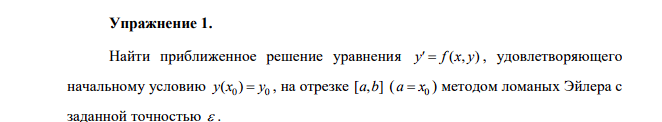

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

In [6]:

from functools import lru_cache
@lru_cache( maxsize = None )

def metod_eulera(funk, x0, y0, a, b, n0, epsilon):
    dx= (b-a) / n0
    Y=[y0]
    X=[x0]
    n = n0
    for i in range( 1, n0 +1 ):
        X.append( X[i-1] + dx)
    #print(X)
    
    for i in range(1,n0+1):
        f = funk.subs(x,X[i-1]).subs(y, Y[i-1] )
        Y.append( Y[i-1] + f * ( X[i] - X[i-1] ) )
    #print(Y)
    plt.plot( X , Y ,"r")

    n0=2*n0
    dx= (b-a) / n0
    Y1=[y0]
    X1=[x0]

    for i in range(1, n0 + 1 ):
        X1.append( X1[i-1] + dx)
    #print(X1)
    for i in range(1,n0+1):
        f = funk.subs(x, X1[i-1] ).subs(y, Y1[i-1] )
        Y1.append( Y1[i-1] + f * (X1[i] - X1[i-1]) )
    #print(Y1)
    plt.plot( X1 , Y1 ,"b")
    razn=[ abs(y1-y2) for y1, y2 in zip(Y1[::2], Y) ]

    if max(razn) < epsilon:
        
        plt.plot( X1 , Y1 ,"g")
        plt.grid()
        return [ X1 , Y1 ]
    
    else:
       metod_eulera(funk, x0, y0, a, b, n0, epsilon)


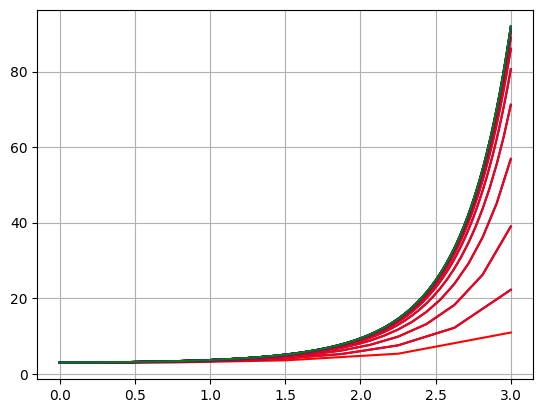

In [7]:
x = sp.symbols("x")
y = sp.symbols("y")
a = metod_eulera( x * (y - 2) ,  0, 3,  0, 3, 4 ,0.1)

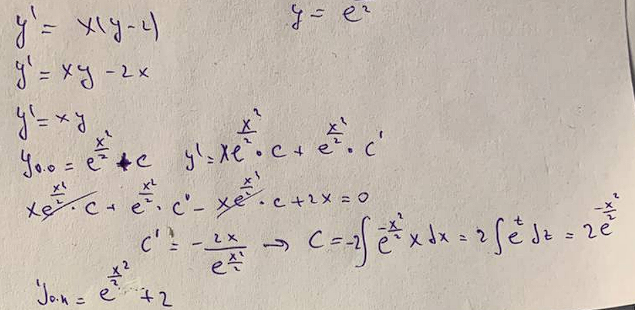

[3, x**2/2 + 3, x**4/8 + x**2/2 + 3, x**6/48 + x**4/8 + x**2/2 + 3, x**8/384 + x**6/48 + x**4/8 + x**2/2 + 3, x**10/3840 + x**8/384 + x**6/48 + x**4/8 + x**2/2 + 3, x**12/46080 + x**10/3840 + x**8/384 + x**6/48 + x**4/8 + x**2/2 + 3, x**14/645120 + x**12/46080 + x**10/3840 + x**8/384 + x**6/48 + x**4/8 + x**2/2 + 3, x**16/10321920 + x**14/645120 + x**12/46080 + x**10/3840 + x**8/384 + x**6/48 + x**4/8 + x**2/2 + 3, x**18/185794560 + x**16/10321920 + x**14/645120 + x**12/46080 + x**10/3840 + x**8/384 + x**6/48 + x**4/8 + x**2/2 + 3, x**20/3715891200 + x**18/185794560 + x**16/10321920 + x**14/645120 + x**12/46080 + x**10/3840 + x**8/384 + x**6/48 + x**4/8 + x**2/2 + 3, x**22/81749606400 + x**20/3715891200 + x**18/185794560 + x**16/10321920 + x**14/645120 + x**12/46080 + x**10/3840 + x**8/384 + x**6/48 + x**4/8 + x**2/2 + 3, x**24/1961990553600 + x**22/81749606400 + x**20/3715891200 + x**18/185794560 + x**16/10321920 + x**14/645120 + x**12/46080 + x**10/3840 + x**8/384 + x**6/48 + x**4/8 

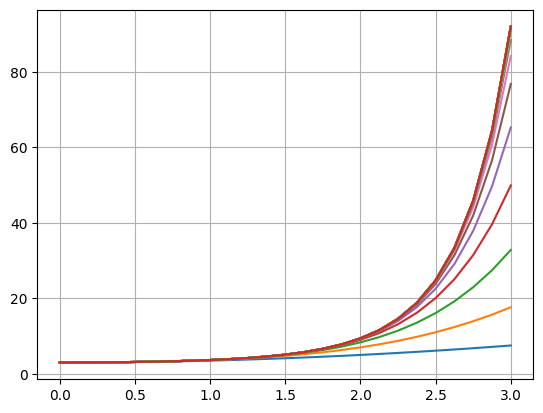

In [11]:
from sympy import integrate

def Pikar(f,x0,y0,a,b,n):
    Y1 = [y0]
    yt = np.zeros(n)
    masx = np.linspace(a, b, n )
    
    for i in range(1,n):
        Y1.append( y0 + integrate( f.subs(y,Y1[i-1]),(x,x0,x) ) )
    print(Y1)

    Y1.pop(0)
    for i in range( 0 , n - 1 ):
        tp=0
        for x1 in masx:
            yt[tp] = Y1[i].subs(x,x1)
            tp += 1
        plt.plot( masx,yt)
    plt.grid()
    print(yt)

   
    tochnoe_reshenie = 2 + np.exp( (masx**2) / 2 ) 
    razn=[abs(y1-y2) for y1, y2 in zip(yt, tochnoe_reshenie)]
    return max(razn)
    

x = sp.symbols( 'x' )
y = sp.symbols( 'y' )

print(Pikar( x*(y-2) ,0,3,0,3,25))
    